In [1]:
from os import path

import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u
from astropy.io import ascii, fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
import reproject

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import h5py

from pyia import GaiaData
import gala.coordinates as gc

from spectral_cube import SpectralCube

/Users/adrian/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
hdu = fits.open('../data/gass_289_32_1526932461.fits.gz')[0]

In [3]:
hdr = hdu.header
del hdr['CUNIT3']

In [4]:
wcs = WCS(hdr)

In [5]:
cube = SpectralCube.read(hdu)

/Users/adrian/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to -2.635e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.291e+00 [aplpy.core]


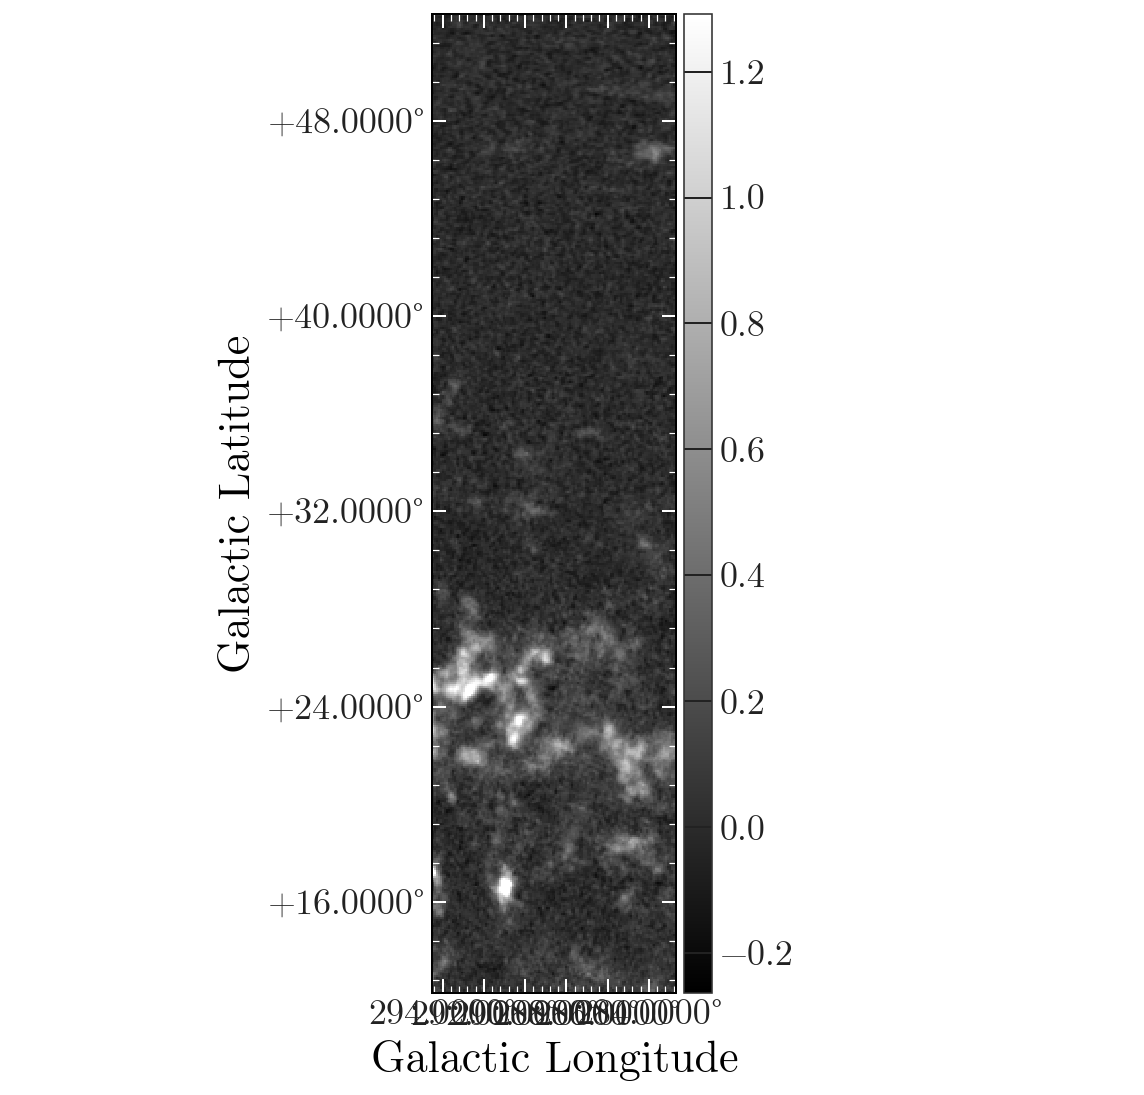

In [6]:
cube[100,:,:].quicklook()

In [7]:
slab = cube.spectral_slab(0*u.km/u.s, 300*u.km/u.s)
two_d = slab.sum(axis=0)

/Users/adrian/anaconda/lib/python3.6/site-packages/spectral_cube/utils.py:39: UserWarning: This function (<function BaseSpectralCube.sum at 0x1c12020a60>) requires loading the entire cube into memory and may therefore be slow.
  "memory and may therefore be slow.".format(str(function)))


---

In [8]:
g = GaiaData('../data/cmd-pm-masked.fits')

In [53]:
# hdu_ha1 = fits.open('../data/SHASSA/110h3.mn.fits.gz')[0]
# hdu_ha2 = fits.open('../data/SHASSA/111h3.mn.fits.gz')[0]
hdu_ha1 = fits.open('../data/SHASSA/110.sm.fits.gz')[0]
hdu_ha2 = fits.open('../data/SHASSA/111.sm.fits.gz')[0]

wcs_ha1 = WCS(hdu_ha1.header)
wcs_ha2 = WCS(hdu_ha2.header)

PDAY        = 210.5613                                                           [astropy.io.fits.card]


In [54]:
wcs_ha1

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 173.121  -30.27  
CRPIX : 508.469  495.3607  
CD1_1 CD1_2  : -0.013212596066  -0.000651079754  
CD2_1 CD2_2  : -0.000656888238  0.013220670633  
NAXIS : 1014  998

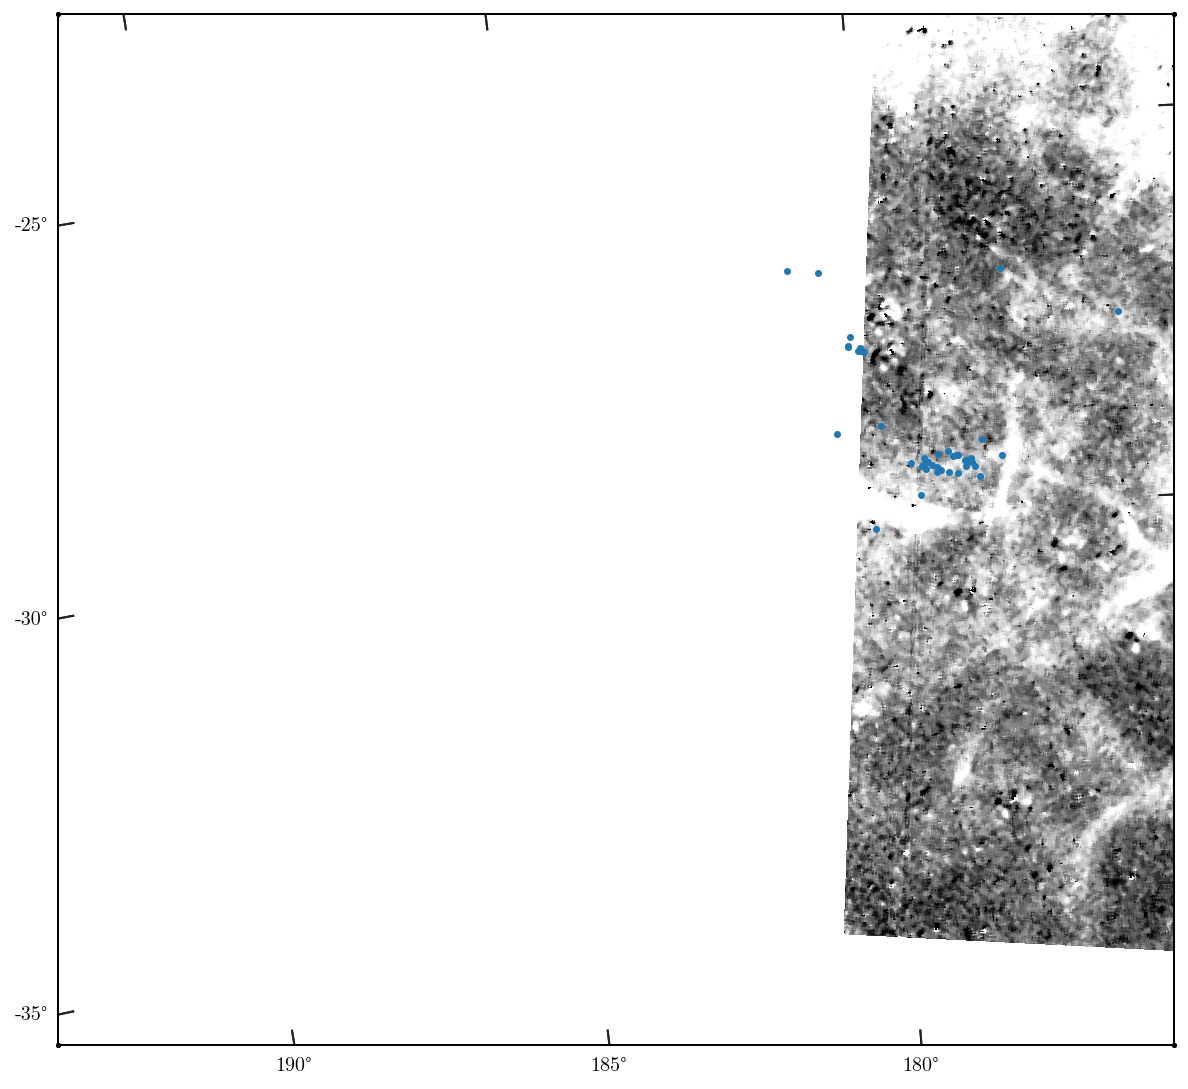

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), 
                       subplot_kw=dict(projection=wcs_ha2))

_data = hdu_ha1.data.ravel()
ax.imshow(hdu_ha1.data.T, cmap='Greys_r', 
          vmin=np.nanpercentile(_data, 5), 
          vmax=np.nanpercentile(_data, 95),
          origin='lower', transform=ax.get_transform(wcs_ha1))

# _data = hdu_ha2.data.ravel()
# ax.imshow(hdu_ha2.data.T, cmap='Greys_r', 
#           vmin=np.nanpercentile(_data, 5), 
#           vmax=np.nanpercentile(_data, 95),
#           origin='lower', transform=ax.get_transform(wcs_ha2))

# ax.contour(two_d, transform=ax.get_transform(two_d.wcs),
#            colors='red', alpha=0.65)

ax.scatter(g.ra.value, g.dec.value, marker='.',
           transform=ax.get_transform('icrs'))

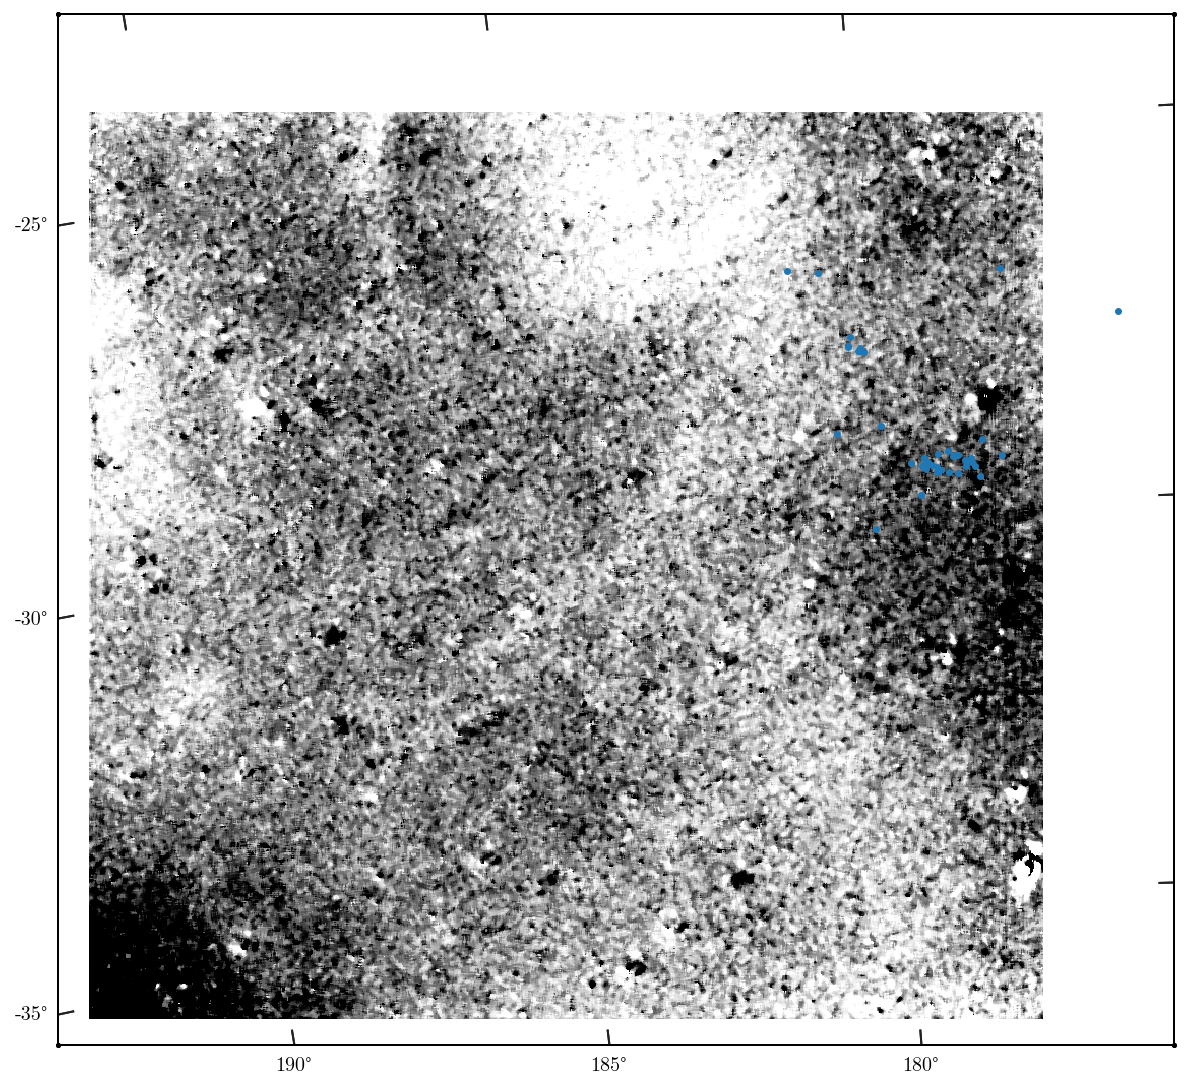

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), 
                       subplot_kw=dict(projection=wcs_ha2))

# _data = hdu_ha1.data.ravel()
# ax.imshow(hdu_ha1.data.T, cmap='Greys_r', 
#           vmin=np.nanpercentile(_data, 5), 
#           vmax=np.nanpercentile(_data, 95),
#           origin='lower', transform=ax.get_transform(wcs_ha1))

_data = hdu_ha2.data.ravel()
ax.imshow(hdu_ha2.data.T, cmap='Greys_r', 
          vmin=np.nanpercentile(_data, 5), 
          vmax=np.nanpercentile(_data, 95),
          origin='lower', transform=ax.get_transform(wcs_ha2))

# ax.contour(two_d, transform=ax.get_transform(two_d.wcs),
#            colors='red', alpha=0.65)

ax.scatter(g.ra.value, g.dec.value, marker='.',
           transform=ax.get_transform('icrs'))